<a href="https://colab.research.google.com/github/pawan-giri/irish_data/blob/master/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
import seaborn as sns
import pandas as pd

In [61]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


preprocessing the data
its various component and ranges

In [62]:
print(dataset.shape)
print(dataset.describe())
print(dataset.groupby('class').size())

(150, 5)
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Visualise the data

Scatterplot

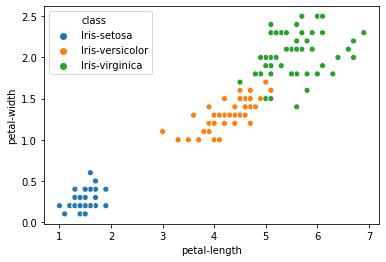

In [63]:
sns.scatterplot(x=dataset['petal-length'],y=dataset['petal-width'],hue=dataset['class'])

Histogram plot

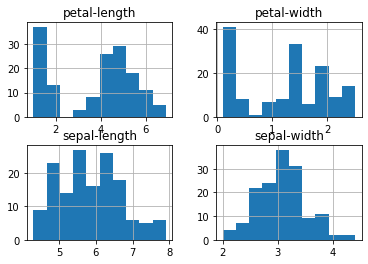

In [64]:
dataset.hist()
plt.show()
#sns.distplot(a=dataset['petal-length'],kde=False)

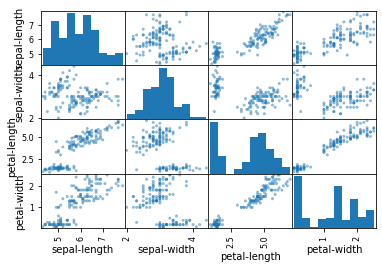

In [65]:
scatter_matrix(dataset)
plt.show()

In [66]:
# Split-out validation dataset
from sklearn import preprocessing
l_encoder= preprocessing.LabelEncoder()
array = dataset.values
X = array[:,0:4]
label=['Iris-setosa','Iris-versicolor','Iris-virginica']
l_encoder.fit(label)
y = l_encoder.transform(array[:,4])
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

Trying Various Algorithms

In [67]:
model = DecisionTreeClassifier(random_state=1)


defining  Function to determine maximum leaf of Decision Tree

In [68]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return (mae)

In [69]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
leaf_node=0
k=get_mae(candidate_max_leaf_nodes[0],X_train,X_validation,Y_train,Y_validation)
for i in range(len(candidate_max_leaf_nodes)) :
    if k>get_mae(candidate_max_leaf_nodes[i],X_train,X_validation,Y_train,Y_validation) :
        k=get_mae(candidate_max_leaf_nodes[i],X_train,X_validation,Y_train,Y_validation)
        leaf_node=candidate_max_leaf_nodes[i]
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
#leaf_node.sort
best_tree_size = leaf_node

Final model after getting maximum leaf

In [70]:
f_model=  DecisionTreeRegressor(max_leaf_nodes=leaf_node, random_state=1)
f_model.fit(X_train,Y_train)
predictions= f_model.predict(X_validation)


we will compare our model prediction and true value

In [71]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



ploting

In [ ]:
df= pd.DataFrame(data=X_validation,columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df['pred']=l_encoder.inverse_transform(predictions)
df['class']=l_encoder.inverse_transform(Y_validation)

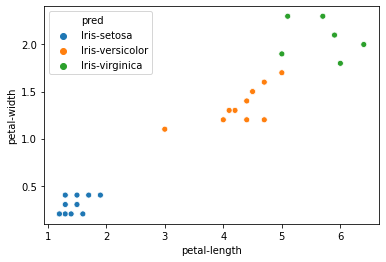

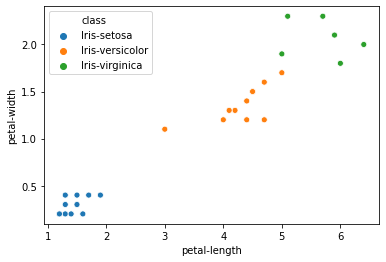

In [95]:
sns.scatterplot(x=df['petal-length'],y=df['petal-width'],hue=df['pred'])
plt.show()
sns.scatterplot(x=df['petal-length'],y=df['petal-width'],hue=df['class'])

Classification using  KNN

K Nearest Neighbour

In [72]:
model= KNeighborsClassifier(algorithm='kd_tree')
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
predictions=model.predict(X_validation)


In [74]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



plot the result


In [94]:
df= pd.DataFrame(data=X_validation,columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df['pred']=l_encoder.inverse_transform(predictions)
df['class']=l_encoder.inverse_transform(Y_validation)

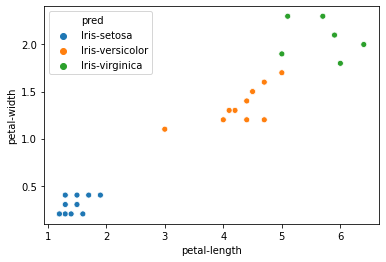

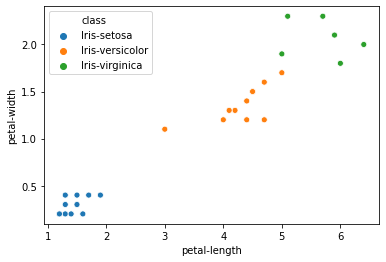

In [93]:

sns.scatterplot(x=df['petal-length'],y=df['petal-width'],hue=df['pred'])
plt.show()
sns.scatterplot(x=df['petal-length'],y=df['petal-width'],hue=df['class'])